In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
# importing the dataset using dask

%time data = pd.read_csv('/content/credit_card.csv')

print(data.shape)

CPU times: user 5.19 s, sys: 941 ms, total: 6.13 s
Wall time: 6.16 s
(2818084, 11)


In [59]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1760076,161,PAYMENT,3185.40,C2004517475,0.00,0.00,M1979804377,0.00,0.00,0.0,0.0
2048317,181,PAYMENT,4401.99,C827856237,0.00,0.00,M1783387221,0.00,0.00,0.0,0.0
1363714,138,CASH_OUT,61561.97,C756520138,52665.00,0.00,C1971415775,0.00,61561.97,0.0,0.0
2304988,188,PAYMENT,7234.43,C728025215,11138.00,3903.57,M205604895,0.00,0.00,0.0,0.0
2304751,188,PAYMENT,6772.38,C1675072392,21289.00,14516.62,M1887577224,0.00,0.00,0.0,0.0
1544528,154,CASH_OUT,166568.82,C1556085489,0.00,0.00,C1308781334,1959804.09,2126372.91,0.0,0.0
572010,24,PAYMENT,4171.80,C2092262833,0.00,0.00,M1033413096,0.00,0.00,0.0,0.0
2499832,204,PAYMENT,12632.62,C732340183,99096.00,86463.38,M915139310,0.00,0.00,0.0,0.0
277448,15,CASH_IN,119106.67,C1832475145,9051961.26,9171067.92,C1070219582,260603.88,141497.21,0.0,0.0
1177586,132,CASH_OUT,141064.92,C1711225827,20508.00,0.00,C1043406757,1958580.80,2099645.73,0.0,0.0


In [60]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818084 entries, 0 to 2818083
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 236.5+ MB


In [61]:
#describing the data

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.818084e+06,2.818084e+06,2.818084e+06,2.818084e+06,2.818084e+06,2.818084e+06,2.818083e+06,2.818083e+06
mean,1.174883e+02,1.566004e+05,8.474312e+05,8.687206e+05,9.931467e+05,1.100797e+06,8.974186e-04,3.548512e-07
std,7.379729e+01,2.641729e+05,2.921521e+06,2.957904e+06,2.297919e+06,2.381972e+06,2.994351e-02,5.956938e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000e+01,1.236017e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.390000e+02,7.580592e+04,1.476600e+04,0.000000e+00,1.366761e+05,2.225549e+05,0.000000e+00,0.000000e+00
75%,1.830000e+02,2.107838e+05,1.145771e+05,1.535777e+05,9.430321e+05,1.128120e+06,0.000000e+00,0.000000e+00
max,2.250000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,1.000000e+00


In [62]:
#checking how many frauds are there

data['isFraud'].value_counts()

0.0    2815554
1.0       2529
Name: isFraud, dtype: int64

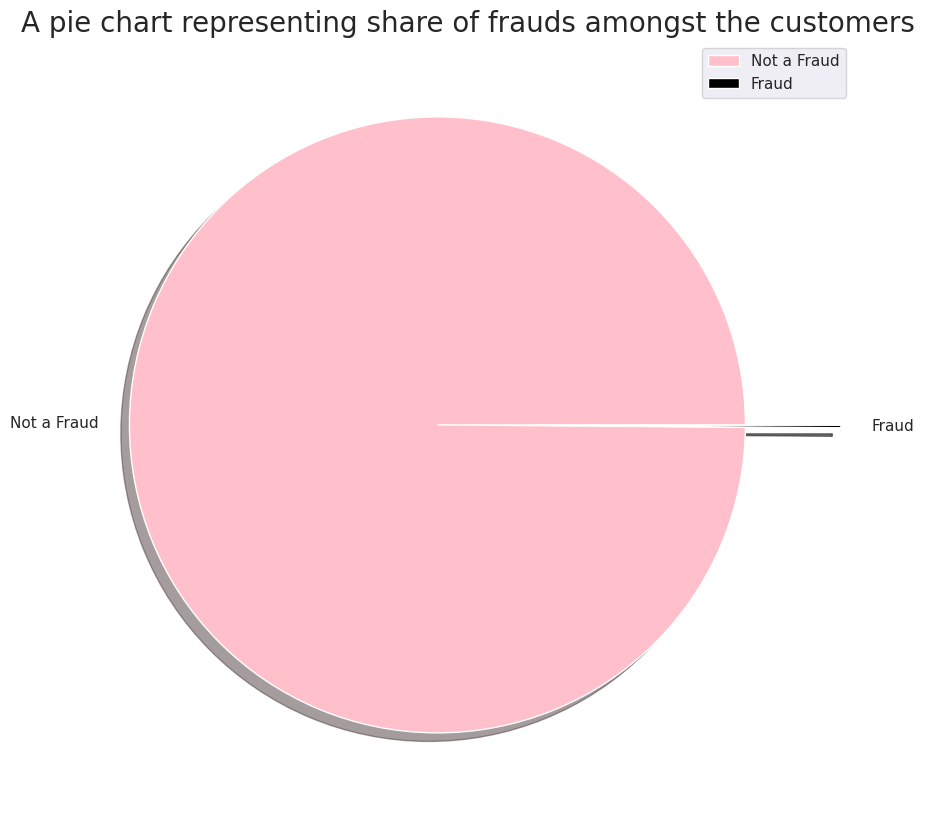

In [63]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [64]:
data['isFlaggedFraud'].value_counts()

0.0    2818082
1.0          1
Name: isFlaggedFraud, dtype: int64

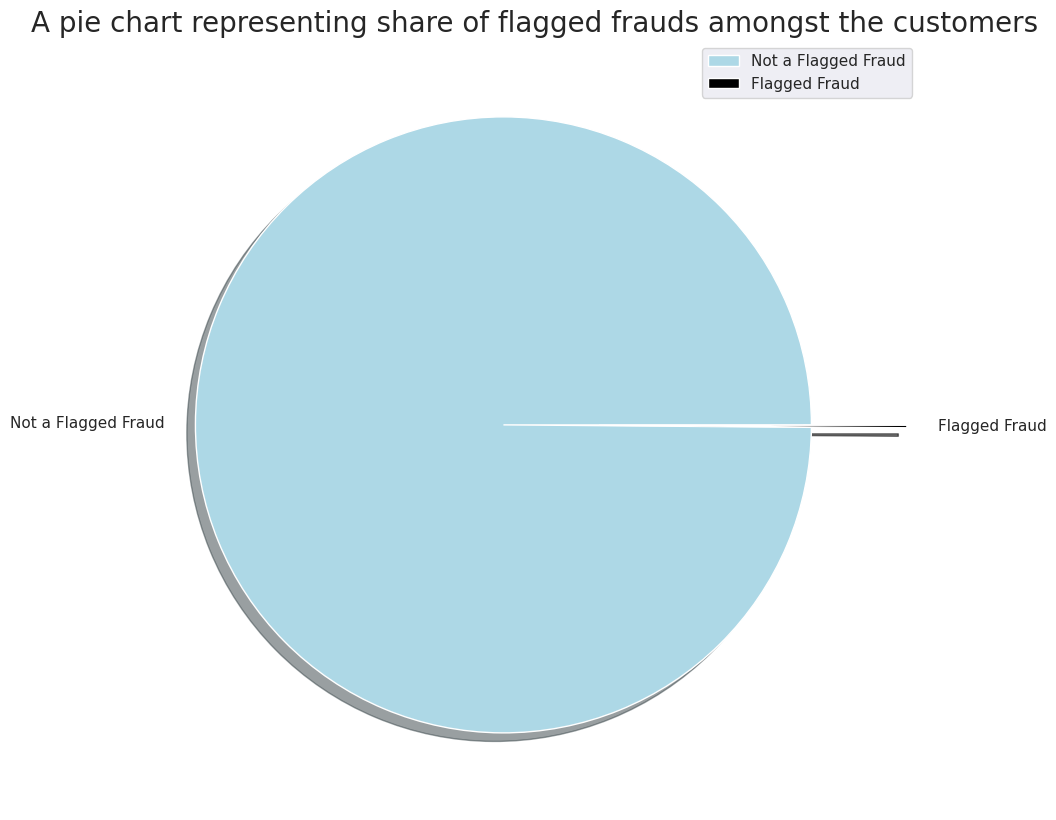

In [65]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [66]:
data['type'].value_counts()

CASH_OUT    1001926
PAYMENT      947931
CASH_IN      617313
TRANSFER     232988
DEBIT         17926
Name: type, dtype: int64

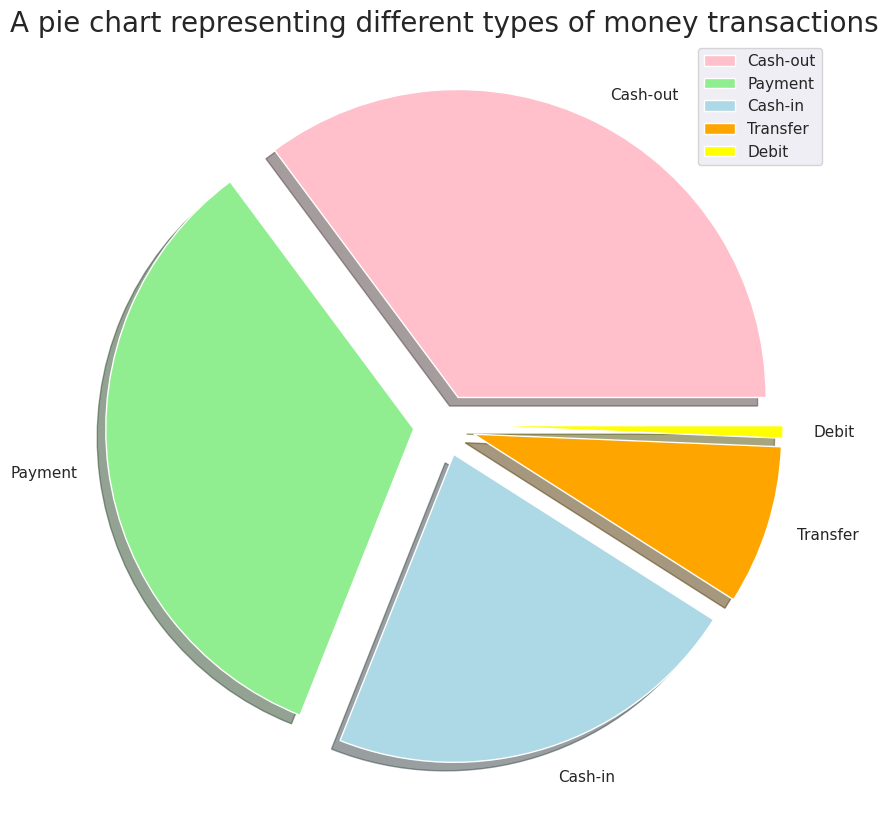

In [67]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [68]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 140


<ipython-input-69-f827899b7a57>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


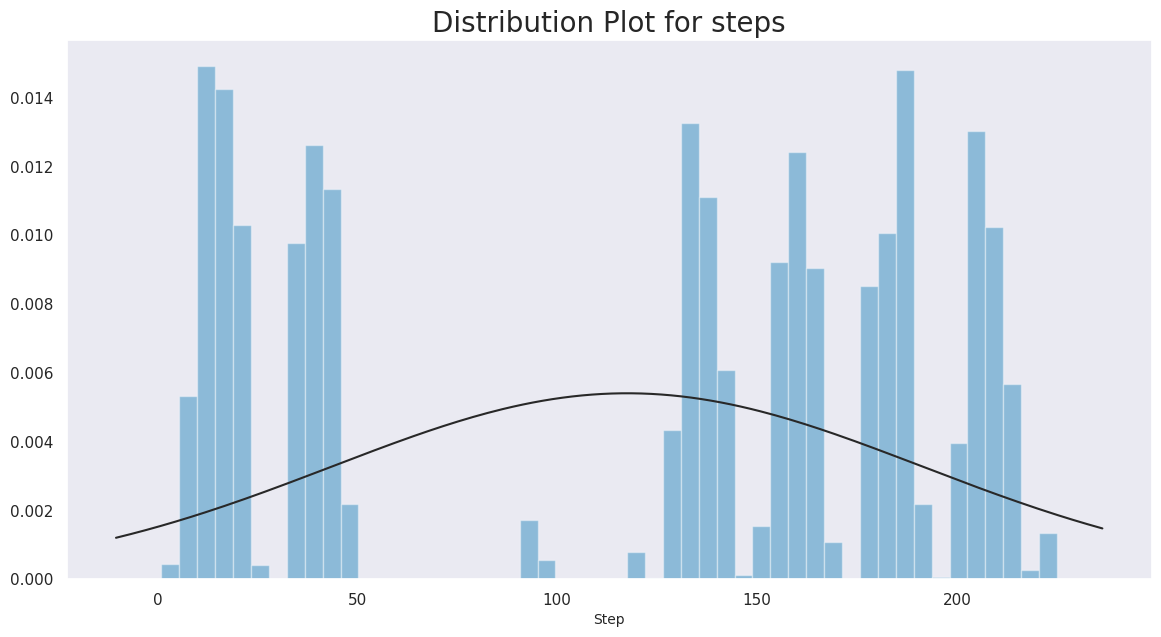

In [69]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

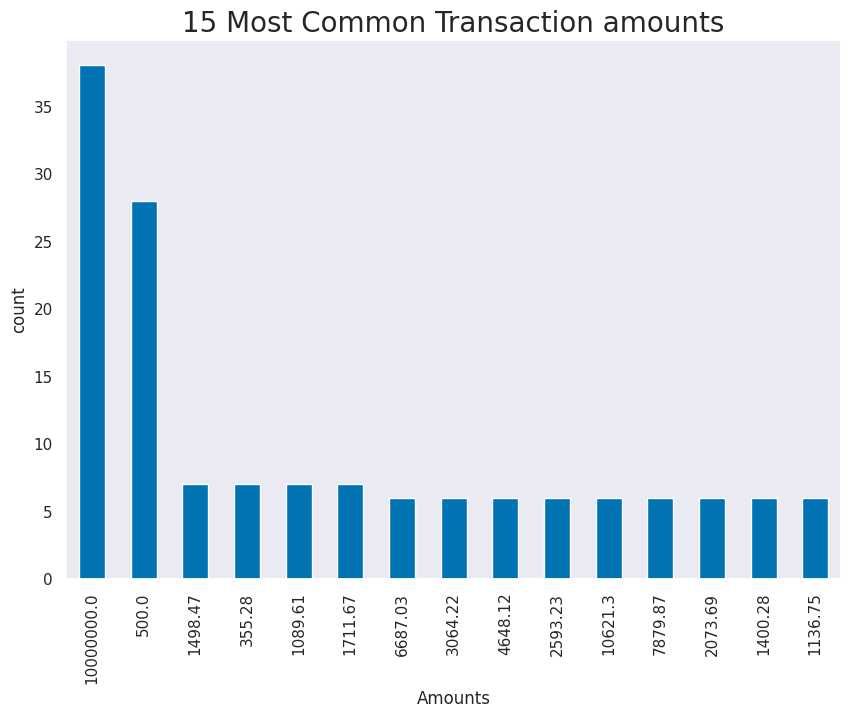

In [70]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

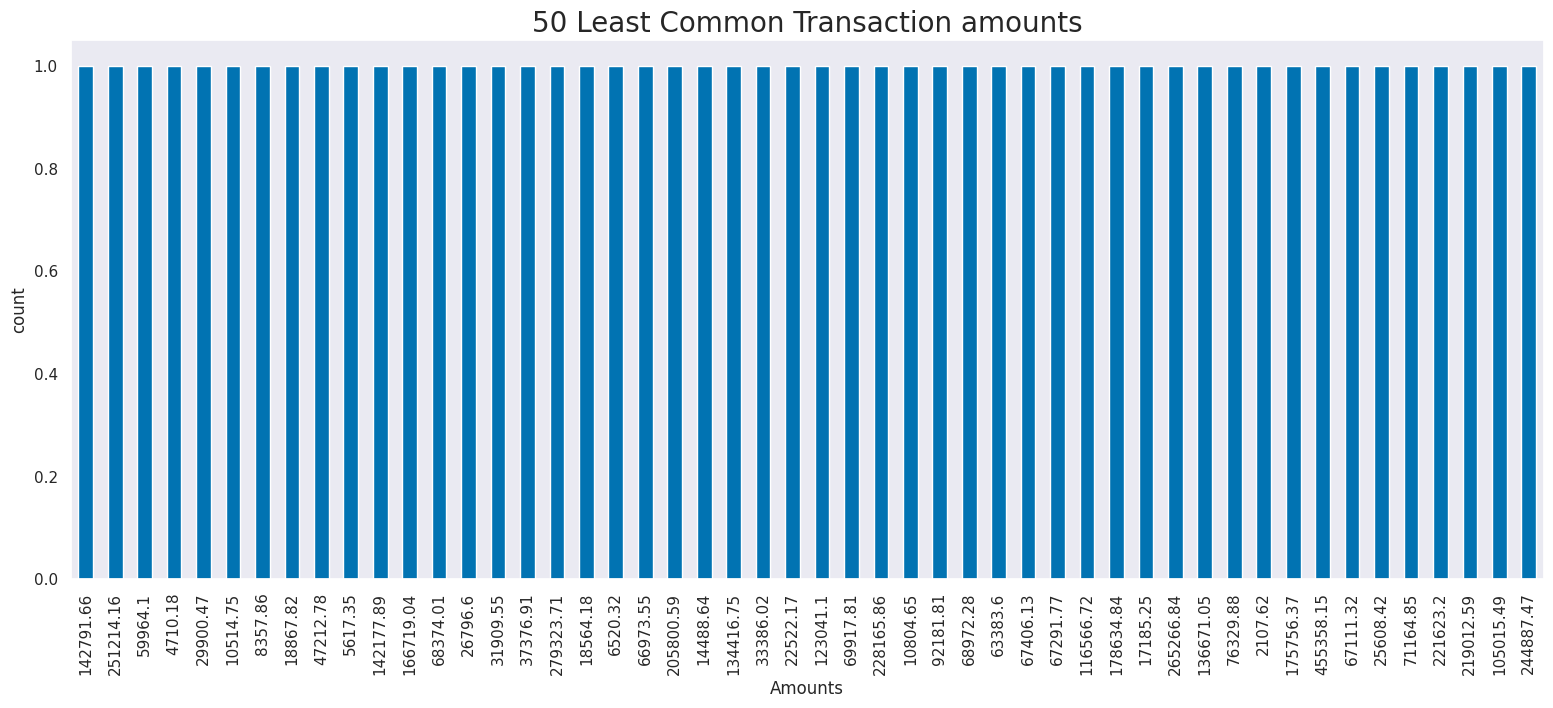

In [71]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

<ipython-input-72-8ee55beaaa83>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.amount)


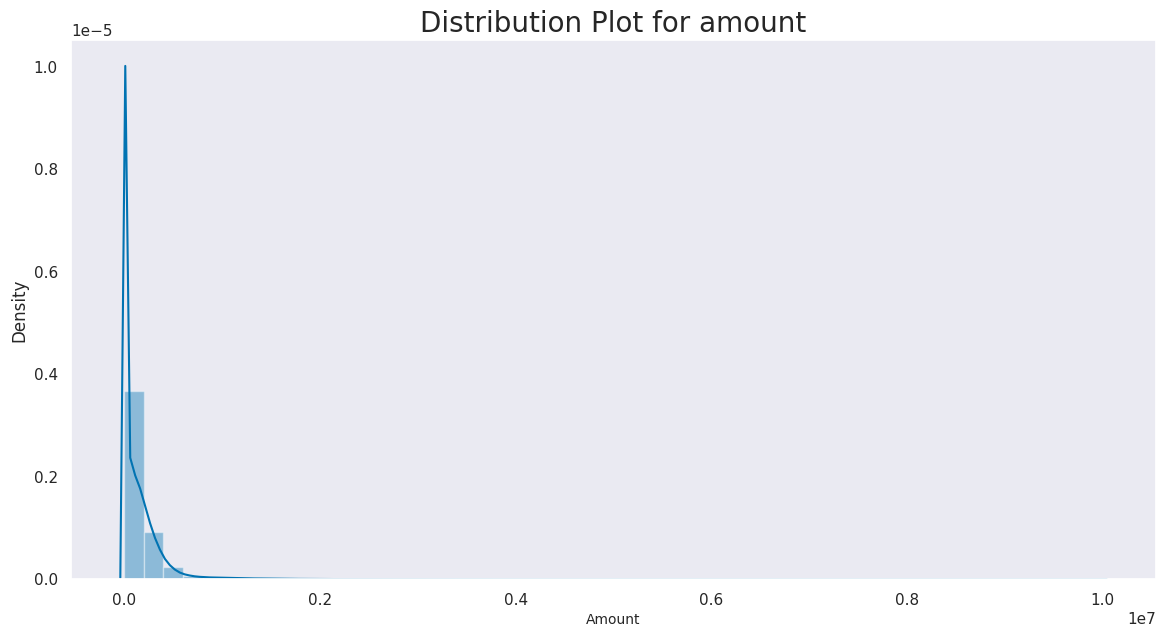

In [72]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [73]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [74]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 1256
The number of fraudulent CASH_OUTs = 1273


In [75]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [76]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [77]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 1
Minimum Transaction : 4953893.08
Maximum Transaction : 4953893.08


In [78]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1           1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2           1  TRANSFER    181.00  C1305486145         181.00            0.00   
4           1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5           1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
...       ...       ...       ...          ...            ...             ...   
2818076   225   PAYMENT   9628.30  C1536067407           0.00            0.00   
2818077   225   PAYMENT  35155.57   C644384468           0.00            0.00   
2818078   225   PAYMENT   5721.72  C1769189999           0.00            0.00   
2818079   225   PAYMENT   3117.38  C2039480175      140236.00       137118.62   

**Dataset where only Transfer Transactions are mentioned**

In [79]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0.0,0.0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0.0,0.0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0.0,0.0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0.0,0.0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0.0,0.0


**Minimum Original old Balance for Flagged Frauds**

In [80]:




# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1.0,1.0


**Maximum Original Balance for Flagged Frauds**

In [81]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1.0,1.0


**Minimum Original Old Balace for non-Flagged Frauds**

In [82]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
160646,12,TRANSFER,342317.15,C2070529657,0.0,0.0,C621118463,0.0,0.0,0.0,0.0
957368,44,TRANSFER,133711.48,C256147273,0.0,0.0,C1582233295,0.0,0.0,0.0,0.0
175828,12,TRANSFER,18931.59,C257351690,0.0,0.0,C1108098323,0.0,0.0,0.0,0.0
1248,1,TRANSFER,271161.74,C1658487789,0.0,0.0,C1219161283,0.0,0.0,0.0,0.0
282796,15,TRANSFER,421255.41,C1734485985,0.0,0.0,C981307359,0.0,0.0,0.0,0.0
381356,17,TRANSFER,630315.29,C2126290948,22.0,0.0,C1203344902,0.0,0.0,0.0,0.0
277265,15,TRANSFER,119.00,C1995557473,119.0,0.0,C1480876722,0.0,0.0,1.0,0.0
1796322,162,TRANSFER,151.00,C1172437299,151.0,0.0,C315826176,0.0,0.0,1.0,0.0
12179,7,TRANSFER,164.00,C1455969984,164.0,0.0,C2119910556,0.0,0.0,1.0,0.0
301801,15,TRANSFER,170.00,C553034695,170.0,0.0,C26381896,0.0,0.0,1.0,0.0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [83]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1141251,131,TRANSFER,10000000.0,C2046014385,17476725.66,7476725.66,C97016938,0.0,0.0,1.0,0.0
1707593,160,TRANSFER,10000000.0,C1274910960,17670038.08,7670038.08,C1270029603,0.0,0.0,1.0,0.0
1054999,96,TRANSFER,10000000.0,C2037845109,18267760.50,8267760.50,C666339947,0.0,0.0,1.0,0.0
1030559,72,TRANSFER,10000000.0,C53057884,18594065.09,8594065.09,C588547519,0.0,0.0,1.0,0.0
1030709,86,TRANSFER,10000000.0,C1843531771,18931607.89,8931607.89,C632110164,0.0,0.0,1.0,0.0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1.0,0.0
2736442,212,TRANSFER,10000000.0,C217654973,24953893.08,14953893.08,C167868594,0.0,0.0,1.0,0.0
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.0,0.0,1.0,0.0
2736440,212,TRANSFER,10000000.0,C1531278091,34953893.08,24953893.08,C972530514,0.0,0.0,1.0,0.0
1707589,160,TRANSFER,10000000.0,C313051938,37670038.08,27670038.08,C2055653883,0.0,0.0,1.0,0.0


In [84]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 4953893.08
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 4953893.08


In [85]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions
# that have isFlaggedFraud set have transacted more than once.

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [86]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 4953893.08
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 4953893.08


In [87]:
data['nameDest'].value_counts().head(20)

C985934102     103
C1286084959    102
C665576141      99
C248609774      94
C1590550415     94
C1360767589     91
C451111351      90
C2083562754     90
C1023714065     88
C306206744      87
C977993101      87
C392292416      87
C716083600      85
C97730845       84
C1789550256     83
C909295153      83
C1782113663     83
C1234776885     82
C1899073220     82
C1674899618     80
Name: nameDest, dtype: int64

In [88]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape


(1234914, 11)

In [89]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0


In [90]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<ipython-input-90-f0384320cda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-90-f0384320cda1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [91]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(1234914, 11)

In [92]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [93]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0,0.0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,0.0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,0.0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,0.0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,0.0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,0.0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.0,0.00,54744.51


In [94]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

True

<ipython-input-95-99472f7a202b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
<ipython-input-95-99472f7a202b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color = 'red')


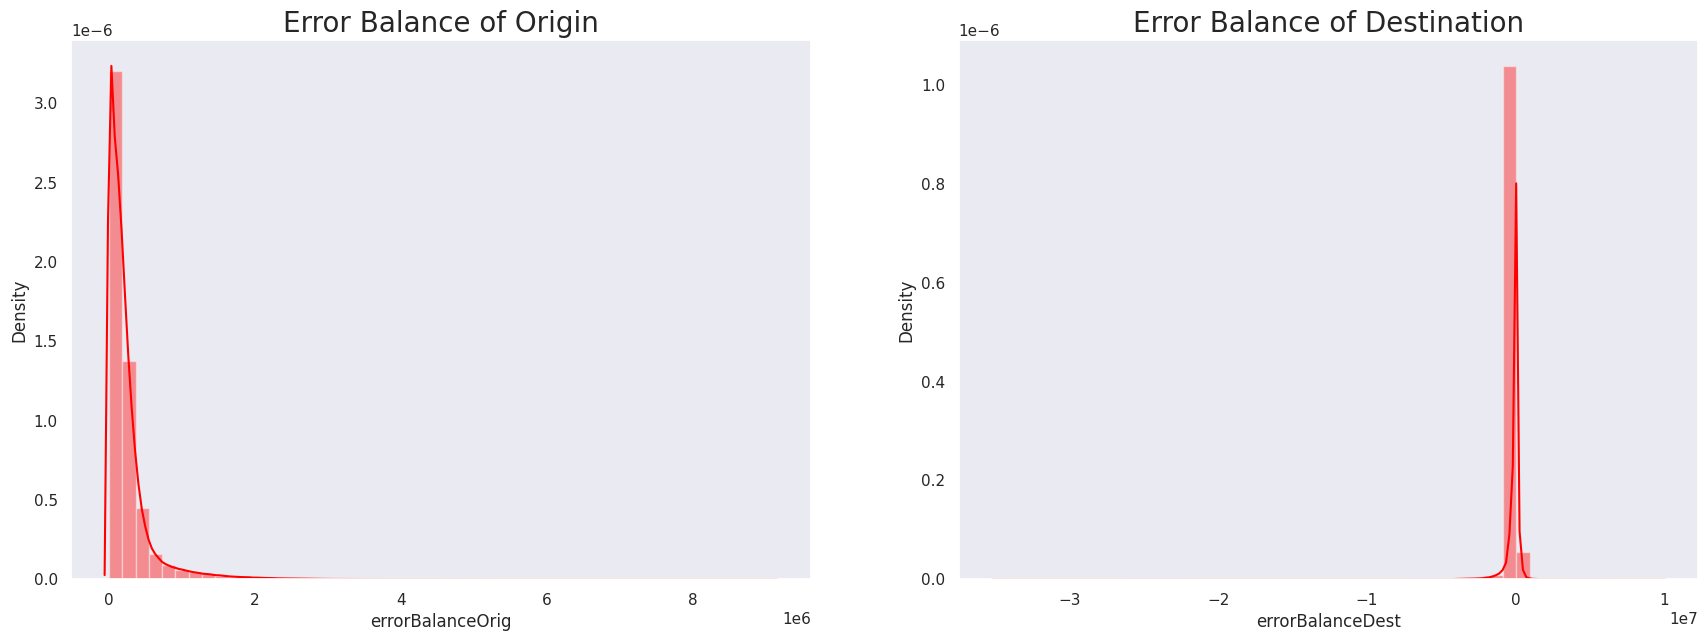

In [95]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

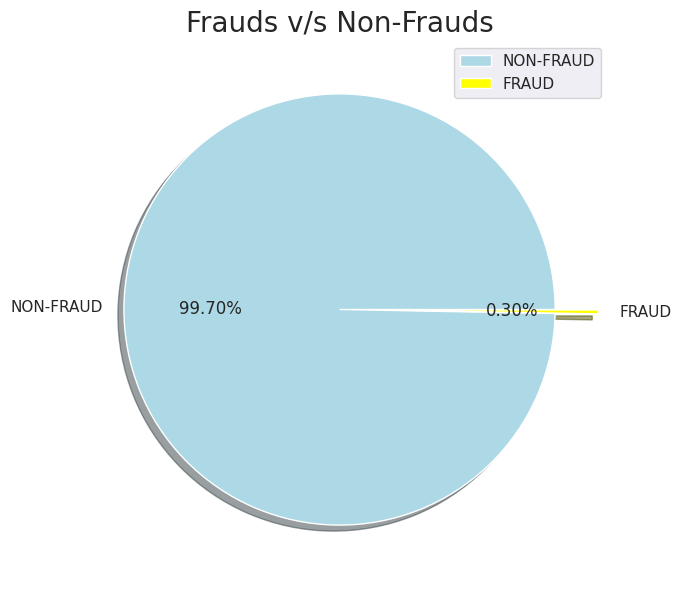

In [96]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()


# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [97]:
X['isFraud'].value_counts()

0.0    1232384
1.0       2529
Name: isFraud, dtype: int64

In [98]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)


Shape of x:  (1234914, 10)
Shape of y:  (1234914,)


In [99]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0.0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.0


**OVER-SAMPLING**

In [100]:
from imblearn.over_sampling import SMOTE

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("X indices:", X.index)
print("Y indices:", Y.index)

# Remove NaN values from Y and corresponding rows from X
Y = Y.dropna()
X = X.loc[Y.index]

# Initialize and apply SMOTE
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X, Y)

# Check the shapes after resampling
print("Shape of x_resample:", x_resample.shape)
print("Shape of y_resample:", y_resample.shape)


X shape: (1234914, 10)
Y shape: (1234914,)
X indices: Int64Index([      2,       3,      15,      19,      24,      42,      47,
                 48,      51,      58,
            ...
            2818021, 2818024, 2818030, 2818031, 2818032, 2818037, 2818039,
            2818048, 2818081, 2818083],
           dtype='int64', length=1234914)
Y indices: Int64Index([      2,       3,      15,      19,      24,      42,      47,
                 48,      51,      58,
            ...
            2818021, 2818024, 2818030, 2818031, 2818032, 2818037, 2818039,
            2818048, 2818081, 2818083],
           dtype='int64', length=1234914)
Shape of x_resample: (2464768, 10)
Shape of y_resample: (2464768,)


In [101]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1971814, 10)
Shape of x_test:  (492954, 10)
Shape of y_train:  (1971814,)
Shape of y_test:  (492954,)


In [102]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modelling using Xg-Boost Model**

In [103]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9989063079340028


In [104]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[246451    207]
 [   125 246171]]


In [105]:
from sklearn.preprocessing import LabelEncoder

# Assume 'type1' is a categorical variable
# You'll need to encode it using LabelEncoder or one-hot encoding
label_encoder = LabelEncoder()
type1_encoded = label_encoder.fit_transform([type1])

In [107]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_input(step1, type1, amount1, OldBalanceOrg1, newBalanceOrg1, oldbalanceDest1, newbalanceDest1, isFraud,errorBalanceOrig,	errorBalanceDest):
    # Assuming 'type1' is a categorical variable, encode it using LabelEncoder
    label_encoder = LabelEncoder()
    type1_encoded = label_encoder.fit_transform([type1])[0]

    # Encode other categorical variables similarly if needed

    # Create a numpy array with the processed data
    processed_input = np.array([step1, type1_encoded, amount1, OldBalanceOrg1,
                                newBalanceOrg1, oldbalanceDest1,
                                newbalanceDest1, isFraud,errorBalanceOrig,	errorBalanceDest], dtype=object)

    # Reshape the array for prediction
    reshaped_input = processed_input.reshape(1, -1)

    return reshaped_input

# Get user input
step1 = int(input('Enter the amount of hours: '))
type1 = str(input('Enter the type of Online Transaction: '))
amount1 = float(input('Enter the amount of the Transaction: '))
OldBalanceOrg1 = float(input('Enter Balance of customer before transaction: '))
newBalanceOrg1 = float(input('Enter Balance of customer after transaction: '))
oldbalanceDest1 = float(input('Enter the initial balance of recipient before the transaction: '))
newbalanceDest1 = float(input('Enter the new balance of recipient after the transaction: '))
isFraud = float(input('Fraud transaction: '))
errorBalanceOrig=float(input("Error Balance Original:"))
errorBalanceDest=float(input("Error Balance New:"))

# Preprocess input data
try:
    processed_input = preprocess_input(step1, type1, amount1, OldBalanceOrg1, newBalanceOrg1,
                                       oldbalanceDest1, newbalanceDest1, isFraud,errorBalanceOrig,	errorBalanceDest)

    # Use the 'predict' method of your model to make predictions
    prediction = model.predict(processed_input)
    if (prediction==0):
      print("The predicted transaction label is: Not Fraud")
    else:
      print("The predicted transaction label is: Fraud")
except Exception as e:
    print("An error occurred during prediction:", e)


Enter the amount of hours: 1
Enter the type of Online Transaction: PAYMENT
Enter the amount of the Transaction: 15000.23
Enter Balance of customer before transaction: 122365.3
Enter Balance of customer after transaction: 1515.02
Enter the initial balance of recipient before the transaction: 151115.3
Enter the new balance of recipient after the transaction: 21216.23
Fraud transaction: 0.0
Error Balance Original:0.0
Error Balance New:181.0
The predicted transaction label is: Not Fraud
